In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cvxopt # smo solver
import cv2

In [2]:
def make_ovr_label(y):
    label = []
    for i in list(set(y)):
        temp = []
        for l in y:
            if l == i:
                temp.append(1.0)
            else:
                temp.append(-1.0)
        label.append(temp)
    return label

##### Linear SVM,   img resize to (112/4,  92/4) 

     pcost       dcost       gap    pres   dres
 0:  1.2587e-04  3.7765e-04  3e+02  1e+00  9e+05
 1:  4.9840e-04 -3.1774e+00  3e+00  1e-02  9e+03
 2:  4.9419e-04 -4.1278e-02  4e-02  1e-04  1e+02
 3:  2.4266e-04 -3.6224e-03  4e-03  1e-05  1e+01
 4:  8.0129e-05 -5.1332e-04  6e-04  2e-06  2e+00
 5:  3.6322e-05 -1.1006e-04  1e-04  4e-07  3e-01
 6:  1.9515e-05 -2.4092e-05  4e-05  1e-07  1e-01
 7:  1.3201e-05  7.7943e-07  1e-05  3e-08  2e-02
 8:  1.0877e-05  9.1037e-06  2e-06  2e-09  2e-03
 9:  1.0537e-05  1.0002e-05  5e-07  5e-10  4e-04
10:  1.0432e-05  1.0376e-05  6e-08  1e-15  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.3735e-05  1.9122e-04  3e+02  1e+00  9e+05
 1:  2.5236e-04 -3.1761e+00  3e+00  1e-02  9e+03
 2:  2.5052e-04 -4.0122e-02  4e-02  1e-04  1e+02
 3:  1.2811e-04 -3.2914e-03  3e-03  1e-05  9e+00
 4:  4.9109e-05 -3.6712e-04  4e-04  1e-06  1e+00
 5:  2.5418e-05 -5.1947e-05  8e-05  2e-07  2e-01
 6:  1.6101e-05  5.6208e-06  1e-05  2e-08  1e-0

     pcost       dcost       gap    pres   dres
 0:  9.4551e-05  2.8367e-04  3e+02  1e+00  9e+05
 1:  3.7439e-04 -3.1771e+00  3e+00  1e-02  9e+03
 2:  3.7276e-04 -4.1105e-02  4e-02  1e-04  1e+02
 3:  2.1197e-04 -3.6241e-03  4e-03  1e-05  1e+01
 4:  8.4547e-05 -4.9866e-04  6e-04  2e-06  1e+00
 5:  4.6686e-05 -6.1509e-05  1e-04  2e-07  2e-01
 6:  3.0286e-05  1.9283e-05  1e-05  1e-15  2e-16
 7:  2.4777e-05  2.1637e-05  3e-06  8e-16  7e-16
 8:  2.3500e-05  2.2802e-05  7e-07  8e-16  6e-16
 9:  2.3335e-05  2.3208e-05  1e-07  8e-16  2e-15
10:  2.3307e-05  2.3296e-05  1e-08  8e-16  5e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.3304e-05  2.4993e-04  3e+02  1e+00  9e+05
 1:  3.2985e-04 -3.1761e+00  3e+00  1e-02  9e+03
 2:  3.2786e-04 -4.0133e-02  4e-02  1e-04  1e+02
 3:  1.7256e-04 -3.8321e-03  4e-03  1e-05  1e+01
 4:  6.3581e-05 -5.7458e-04  6e-04  2e-06  2e+00
 5:  3.0266e-05 -6.5965e-05  1e-04  2e-07  2e-01
 6:  1.9005e-05  5.7048e-06  1e-05  2e-08  2e-0

11:  9.5012e-06  9.5004e-06  8e-10  3e-13  2e-07
12:  9.5011e-06  9.5011e-06  1e-11  3e-15  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9374e-05  2.9814e-04  3e+02  1e+00  9e+05
 1:  3.9347e-04 -3.1761e+00  3e+00  1e-02  9e+03
 2:  3.8983e-04 -4.0016e-02  4e-02  1e-04  1e+02
 3:  1.9979e-04 -3.1583e-03  3e-03  1e-05  9e+00
 4:  7.8940e-05 -4.3387e-04  5e-04  1e-06  1e+00
 5:  4.0577e-05 -5.2308e-05  9e-05  2e-07  2e-01
 6:  2.6431e-05  1.0098e-05  2e-05  3e-08  3e-02
 7:  2.2521e-05  1.8266e-05  4e-06  6e-09  5e-03
 8:  2.1232e-05  2.0312e-05  9e-07  8e-10  7e-04
 9:  2.1034e-05  2.0868e-05  2e-07  4e-11  4e-05
10:  2.1004e-05  2.0990e-05  1e-08  2e-12  2e-06
11:  2.1002e-05  2.1001e-05  3e-10  3e-14  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.7987e-05  2.9398e-04  3e+02  1e+00  9e+05
 1:  3.8798e-04 -3.1809e+00  3e+00  1e-02  9e+03
 2:  3.8465e-04 -4.4811e-02  5e-02  1e-04  1e+02
 3:  2.0625e-04 -5.5143

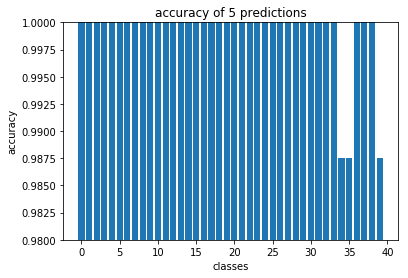

     pcost       dcost       gap    pres   dres
 0:  1.4235e-04  4.2709e-04  3e+02  1e+00  9e+05
 1:  5.6363e-04 -3.1782e+00  3e+00  1e-02  9e+03
 2:  5.5787e-04 -4.2172e-02  4e-02  1e-04  1e+02
 3:  2.6791e-04 -4.2795e-03  5e-03  1e-05  1e+01
 4:  9.7097e-05 -5.7704e-04  7e-04  2e-06  2e+00
 5:  4.1618e-05 -9.7771e-05  1e-04  4e-07  3e-01
 6:  2.2498e-05 -1.9720e-05  4e-05  1e-07  9e-02
 7:  1.4948e-05  5.8555e-06  9e-06  2e-08  1e-02
 8:  1.3055e-05  1.1407e-05  2e-06  1e-09  1e-03
 9:  1.2743e-05  1.2319e-05  4e-07  3e-10  2e-04
10:  1.2672e-05  1.2634e-05  4e-08  2e-15  4e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.2821e-05  1.8848e-04  3e+02  1e+00  9e+05
 1:  2.4874e-04 -3.1763e+00  3e+00  1e-02  9e+03
 2:  2.4667e-04 -4.0326e-02  4e-02  1e-04  1e+02
 3:  1.2743e-04 -2.8954e-03  3e-03  9e-06  8e+00
 4:  4.6815e-05 -2.8918e-04  3e-04  9e-07  9e-01
 5:  2.4217e-05 -3.5118e-05  6e-05  1e-07  1e-01
 6:  1.5146e-05  7.6983e-06  7e-06  8e-09  8e-0

     pcost       dcost       gap    pres   dres
 0:  6.8269e-05  2.0482e-04  3e+02  1e+00  9e+05
 1:  2.7032e-04 -3.1744e+00  3e+00  1e-02  9e+03
 2:  2.6908e-04 -3.8479e-02  4e-02  1e-04  1e+02
 3:  1.4471e-04 -3.5206e-03  4e-03  1e-05  1e+01
 4:  4.8868e-05 -5.3753e-04  6e-04  2e-06  2e+00
 5:  2.1924e-05 -8.5934e-05  1e-04  3e-07  3e-01
 6:  1.2587e-05 -1.0280e-05  2e-05  5e-08  5e-02
 7:  8.6134e-06  6.1418e-06  2e-06  3e-09  3e-03
 8:  7.9196e-06  7.4113e-06  5e-07  5e-10  4e-04
 9:  7.8058e-06  7.7353e-06  7e-08  4e-11  4e-05
10:  7.7935e-06  7.7891e-06  4e-09  2e-12  2e-06
11:  7.7929e-06  7.7928e-06  1e-10  2e-14  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1597e-04  3.4793e-04  3e+02  1e+00  9e+05
 1:  4.5919e-04 -3.1781e+00  3e+00  1e-02  9e+03
 2:  4.5602e-04 -4.2074e-02  4e-02  1e-04  1e+02
 3:  2.4256e-04 -4.4509e-03  5e-03  1e-05  1e+01
 4:  9.0902e-05 -5.4803e-04  6e-04  2e-06  2e+00
 5:  4.9041e-05 -6.7669e-05  1e-04  3e-07  3e-0

 2:  2.2206e-04 -3.8757e-02  4e-02  1e-04  1e+02
 3:  1.2858e-04 -3.2613e-03  3e-03  1e-05  9e+00
 4:  4.8911e-05 -3.4812e-04  4e-04  1e-06  1e+00
 5:  2.3081e-05 -5.6145e-05  8e-05  2e-07  2e-01
 6:  1.4134e-05 -2.9244e-06  2e-05  4e-08  3e-02
 7:  1.0692e-05  7.5015e-06  3e-06  5e-09  4e-03
 8:  9.8594e-06  9.0870e-06  8e-07  9e-10  8e-04
 9:  9.6983e-06  9.5215e-06  2e-07  2e-10  1e-04
10:  9.6711e-06  9.6450e-06  3e-08  1e-15  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.8497e-05  2.9551e-04  3e+02  1e+00  9e+05
 1:  3.8999e-04 -3.1770e+00  3e+00  1e-02  9e+03
 2:  3.8597e-04 -4.0900e-02  4e-02  1e-04  1e+02
 3:  1.8997e-04 -4.0577e-03  4e-03  1e-05  1e+01
 4:  7.6571e-05 -4.5388e-04  5e-04  1e-06  1e+00
 5:  3.7529e-05 -6.2437e-05  1e-04  2e-07  2e-01
 6:  2.3799e-05  3.2648e-06  2e-05  4e-08  4e-02
 7:  1.9245e-05  1.4722e-05  5e-06  7e-09  6e-03
 8:  1.7974e-05  1.6990e-05  1e-06  1e-09  1e-03
 9:  1.7740e-05  1.7589e-05  2e-07  1e-11  1e-

     pcost       dcost       gap    pres   dres
 0:  1.5113e-04  4.5343e-04  3e+02  1e+00  9e+05
 1:  5.9843e-04 -3.1776e+00  3e+00  1e-02  9e+03
 2:  5.9459e-04 -4.1333e-02  4e-02  1e-04  1e+02
 3:  3.3205e-04 -3.9891e-03  4e-03  1e-05  1e+01
 4:  1.3969e-04 -6.5721e-04  8e-04  2e-06  2e+00
 5:  7.4185e-05 -1.0047e-04  2e-04  4e-07  4e-01
 6:  4.7483e-05 -6.3292e-06  5e-05  1e-07  1e-01
 7:  3.5329e-05  2.5716e-05  1e-05  2e-08  1e-02
 8:  3.2936e-05  3.1014e-05  2e-06  2e-09  2e-03
 9:  3.2496e-05  3.2232e-05  3e-07  2e-10  2e-04
10:  3.2446e-05  3.2422e-05  2e-08  2e-11  1e-05
11:  3.2442e-05  3.2441e-05  5e-10  3e-13  2e-07
12:  3.2441e-05  3.2441e-05  2e-11  4e-15  3e-09
Optimal solution found.


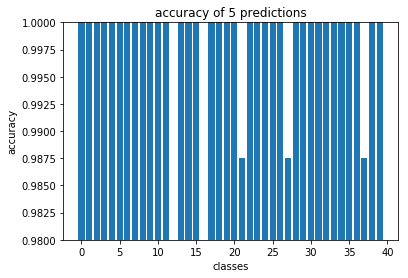

     pcost       dcost       gap    pres   dres
 0:  1.4910e-04  4.4735e-04  3e+02  1e+00  9e+05
 1:  5.9037e-04 -3.1782e+00  3e+00  1e-02  9e+03
 2:  5.8391e-04 -4.1946e-02  4e-02  1e-04  1e+02
 3:  2.7427e-04 -4.2187e-03  4e-03  1e-05  1e+01
 4:  9.2677e-05 -6.0596e-04  7e-04  2e-06  2e+00
 5:  4.1842e-05 -1.2102e-04  2e-04  4e-07  4e-01
 6:  2.2587e-05 -2.7354e-05  5e-05  1e-07  1e-01
 7:  1.4669e-05  4.9745e-06  1e-05  2e-08  2e-02
 8:  1.2595e-05  1.1307e-05  1e-06  1e-09  1e-03
 9:  1.2308e-05  1.2092e-05  2e-07  2e-10  1e-04
10:  1.2270e-05  1.2240e-05  3e-08  2e-15  3e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3141e-05  1.5944e-04  3e+02  1e+00  9e+05
 1:  2.1041e-04 -3.1759e+00  3e+00  1e-02  9e+03
 2:  2.0857e-04 -3.9908e-02  4e-02  1e-04  1e+02
 3:  1.0916e-04 -2.8408e-03  3e-03  9e-06  8e+00
 4:  4.2476e-05 -2.7548e-04  3e-04  9e-07  8e-01
 5:  2.2146e-05 -3.0816e-05  5e-05  1e-07  1e-01
 6:  1.4066e-05  8.0754e-06  6e-06  5e-09  5e-0

 7:  9.0279e-06  5.1774e-06  4e-06  7e-09  6e-03
 8:  8.2089e-06  7.4089e-06  8e-07  1e-09  1e-03
 9:  8.0610e-06  7.9590e-06  1e-07  8e-11  7e-05
10:  8.0474e-06  8.0437e-06  4e-09  2e-12  2e-06
11:  8.0469e-06  8.0468e-06  7e-11  2e-14  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0373e-04  3.1122e-04  3e+02  1e+00  9e+05
 1:  4.1075e-04 -3.1776e+00  3e+00  1e-02  9e+03
 2:  4.0847e-04 -4.1558e-02  4e-02  1e-04  1e+02
 3:  2.2474e-04 -4.1326e-03  4e-03  1e-05  1e+01
 4:  8.9312e-05 -6.0253e-04  7e-04  2e-06  2e+00
 5:  4.9036e-05 -8.8131e-05  1e-04  3e-07  3e-01
 6:  3.2290e-05  1.6283e-05  2e-05  1e-08  1e-02
 7:  2.5240e-05  2.1798e-05  3e-06  3e-09  2e-03
 8:  2.4086e-05  2.3342e-05  7e-07  1e-10  1e-04
 9:  2.3921e-05  2.3756e-05  2e-07  2e-11  2e-05
10:  2.3885e-05  2.3877e-05  8e-09  5e-13  4e-07
11:  2.3883e-05  2.3883e-05  3e-10  1e-14  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.2621e-05  2.4788

11:  8.9238e-06  8.9224e-06  1e-09  6e-13  6e-07
12:  8.9236e-06  8.9236e-06  2e-11  6e-15  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0970e-04  3.2912e-04  3e+02  1e+00  9e+05
 1:  4.3434e-04 -3.1781e+00  3e+00  1e-02  9e+03
 2:  4.2969e-04 -4.2094e-02  4e-02  1e-04  1e+02
 3:  2.1069e-04 -3.9740e-03  4e-03  1e-05  1e+01
 4:  8.5803e-05 -6.0387e-04  7e-04  2e-06  2e+00
 5:  4.3806e-05 -8.2038e-05  1e-04  3e-07  3e-01
 6:  2.7527e-05  4.3004e-06  2e-05  5e-08  4e-02
 7:  2.2443e-05  1.7526e-05  5e-06  7e-09  7e-03
 8:  2.1079e-05  1.9891e-05  1e-06  2e-09  1e-03
 9:  2.0824e-05  2.0547e-05  3e-07  2e-10  2e-04
10:  2.0766e-05  2.0748e-05  2e-08  5e-12  5e-06
11:  2.0763e-05  2.0762e-05  6e-10  1e-13  1e-07
12:  2.0763e-05  2.0763e-05  2e-11  2e-15  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.4839e-05  2.8454e-04  3e+02  1e+00  9e+05
 1:  3.7552e-04 -3.1755e+00  3e+00  1e-02  9e+03
 2:  3.7300e-04 -3.9514

 4:  1.3750e-04 -5.6695e-04  7e-04  2e-06  2e+00
 5:  7.2996e-05 -1.1111e-04  2e-04  5e-07  4e-01
 6:  4.5256e-05 -5.2305e-06  5e-05  1e-07  1e-01
 7:  3.4506e-05  2.4785e-05  1e-05  2e-08  1e-02
 8:  3.1976e-05  3.0534e-05  1e-06  1e-09  1e-03
 9:  3.1661e-05  3.1483e-05  2e-07  1e-10  9e-05
10:  3.1626e-05  3.1616e-05  9e-09  4e-12  4e-06
11:  3.1624e-05  3.1624e-05  2e-10  6e-14  6e-08
Optimal solution found.


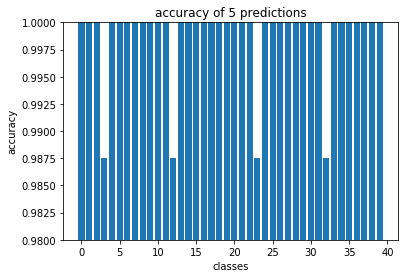

     pcost       dcost       gap    pres   dres
 0:  1.2081e-04  3.6246e-04  3e+02  1e+00  9e+05
 1:  4.7836e-04 -3.1766e+00  3e+00  1e-02  9e+03
 2:  4.7413e-04 -4.0591e-02  4e-02  1e-04  1e+02
 3:  2.4046e-04 -4.2557e-03  4e-03  1e-05  1e+01
 4:  8.9177e-05 -6.1763e-04  7e-04  2e-06  2e+00
 5:  3.9340e-05 -1.1318e-04  2e-04  4e-07  4e-01
 6:  2.0011e-05 -1.6977e-05  4e-05  9e-08  8e-02
 7:  1.3558e-05  5.4215e-06  8e-06  2e-08  1e-02
 8:  1.1901e-05  1.0336e-05  2e-06  2e-09  2e-03
 9:  1.1565e-05  1.1311e-05  3e-07  2e-10  2e-04
10:  1.1526e-05  1.1508e-05  2e-08  2e-12  2e-06
11:  1.1523e-05  1.1522e-05  6e-10  3e-14  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.1578e-05  1.8475e-04  3e+02  1e+00  9e+05
 1:  2.4382e-04 -3.1769e+00  3e+00  1e-02  9e+03
 2:  2.4160e-04 -4.0895e-02  4e-02  1e-04  1e+02
 3:  1.2204e-04 -3.1494e-03  3e-03  1e-05  9e+00
 4:  4.6623e-05 -3.3956e-04  4e-04  1e-06  1e+00
 5:  2.4519e-05 -3.6389e-05  6e-05  1e-07  1e-0

 4:  3.6377e-05 -3.0749e-04  3e-04  1e-06  9e-01
 5:  1.7393e-05 -5.2842e-05  7e-05  2e-07  2e-01
 6:  1.0434e-05 -4.2912e-06  1e-05  3e-08  3e-02
 7:  7.6857e-06  5.2289e-06  2e-06  4e-09  4e-03
 8:  7.0781e-06  6.6260e-06  5e-07  6e-10  5e-04
 9:  6.9967e-06  6.9133e-06  8e-08  7e-11  6e-05
10:  6.9846e-06  6.9764e-06  8e-09  5e-12  5e-06
11:  6.9835e-06  6.9834e-06  1e-10  6e-14  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9413e-05  2.9826e-04  3e+02  1e+00  9e+05
 1:  3.9363e-04 -3.1776e+00  3e+00  1e-02  9e+03
 2:  3.9111e-04 -4.1625e-02  4e-02  1e-04  1e+02
 3:  2.1866e-04 -4.7664e-03  5e-03  2e-05  1e+01
 4:  9.0844e-05 -5.5216e-04  6e-04  2e-06  2e+00
 5:  4.9192e-05 -7.0383e-05  1e-04  3e-07  3e-01
 6:  3.2282e-05  1.7849e-05  1e-05  9e-09  8e-03
 7:  2.5593e-05  2.2293e-05  3e-06  2e-09  2e-03
 8:  2.4523e-05  2.3815e-05  7e-07  2e-10  1e-04
 9:  2.4340e-05  2.4236e-05  1e-07  1e-11  1e-05
10:  2.4317e-05  2.4313e-05  4e-09  3e-13  3e-

 6:  1.2483e-05 -8.9202e-08  1e-05  2e-08  2e-02
 7:  9.4530e-06  7.1334e-06  2e-06  3e-09  3e-03
 8:  8.8259e-06  8.1960e-06  6e-07  8e-10  7e-04
 9:  8.6995e-06  8.5679e-06  1e-07  9e-11  8e-05
10:  8.6769e-06  8.6683e-06  9e-09  3e-13  2e-07
11:  8.6758e-06  8.6754e-06  4e-10  1e-14  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.4047e-05  2.2215e-04  3e+02  1e+00  9e+05
 1:  2.9319e-04 -3.1756e+00  3e+00  1e-02  9e+03
 2:  2.9166e-04 -3.9541e-02  4e-02  1e-04  1e+02
 3:  1.6122e-04 -3.3021e-03  3e-03  1e-05  9e+00
 4:  6.4405e-05 -4.1071e-04  5e-04  1e-06  1e+00
 5:  3.3253e-05 -5.1635e-05  8e-05  2e-07  2e-01
 6:  2.1640e-05  4.7731e-06  2e-05  3e-08  3e-02
 7:  1.7678e-05  1.3653e-05  4e-06  6e-09  5e-03
 8:  1.6616e-05  1.5553e-05  1e-06  1e-09  1e-03
 9:  1.6411e-05  1.6026e-05  4e-07  2e-15  1e-15
10:  1.6333e-05  1.6257e-05  8e-08  2e-15  3e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.7742e-05  2.9325

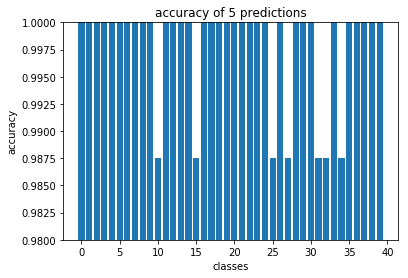

     pcost       dcost       gap    pres   dres
 0:  1.0883e-04  3.2651e-04  3e+02  1e+00  9e+05
 1:  4.3091e-04 -3.1763e+00  3e+00  1e-02  9e+03
 2:  4.2788e-04 -4.0304e-02  4e-02  1e-04  1e+02
 3:  2.1925e-04 -3.6807e-03  4e-03  1e-05  1e+01
 4:  7.8481e-05 -5.4423e-04  6e-04  2e-06  2e+00
 5:  3.4240e-05 -8.7120e-05  1e-04  3e-07  3e-01
 6:  1.8771e-05 -2.0140e-05  4e-05  1e-07  9e-02
 7:  1.2262e-05  5.3303e-06  7e-06  1e-08  1e-02
 8:  1.0746e-05  9.5410e-06  1e-06  1e-09  1e-03
 9:  1.0515e-05  1.0382e-05  1e-07  1e-10  9e-05
10:  1.0494e-05  1.0482e-05  1e-08  7e-12  6e-06
11:  1.0492e-05  1.0492e-05  3e-10  1e-13  1e-07
12:  1.0492e-05  1.0492e-05  8e-12  2e-15  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.0659e-05  1.5199e-04  3e+02  1e+00  9e+05
 1:  2.0059e-04 -3.1743e+00  3e+00  1e-02  9e+03
 2:  1.9945e-04 -3.8223e-02  4e-02  1e-04  1e+02
 3:  1.0827e-04 -2.7468e-03  3e-03  9e-06  8e+00
 4:  4.3129e-05 -3.5994e-04  4e-04  1e-06  1e+0

 2:  2.5082e-04 -3.8172e-02  4e-02  1e-04  1e+02
 3:  1.3224e-04 -3.5328e-03  4e-03  1e-05  1e+01
 4:  4.4895e-05 -4.9163e-04  5e-04  2e-06  1e+00
 5:  1.9578e-05 -5.6100e-05  8e-05  2e-07  2e-01
 6:  1.1232e-05 -5.2262e-06  2e-05  4e-08  3e-02
 7:  8.1419e-06  5.4397e-06  3e-06  4e-09  4e-03
 8:  7.4777e-06  6.9574e-06  5e-07  4e-10  4e-04
 9:  7.3772e-06  7.3038e-06  7e-08  2e-11  2e-05
10:  7.3675e-06  7.3606e-06  7e-09  1e-12  1e-06
11:  7.3667e-06  7.3665e-06  2e-10  3e-14  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0829e-04  3.2490e-04  3e+02  1e+00  9e+05
 1:  4.2879e-04 -3.1779e+00  3e+00  1e-02  9e+03
 2:  4.2504e-04 -4.1885e-02  4e-02  1e-04  1e+02
 3:  2.2148e-04 -4.8413e-03  5e-03  2e-05  1e+01
 4:  9.1403e-05 -6.2217e-04  7e-04  2e-06  2e+00
 5:  4.8848e-05 -6.4147e-05  1e-04  3e-07  2e-01
 6:  3.1930e-05  1.7670e-05  1e-05  7e-09  6e-03
 7:  2.5584e-05  2.1653e-05  4e-06  2e-09  2e-03
 8:  2.4113e-05  2.3294e-05  8e-07  2e-10  2e-

11:  1.6178e-05  1.6172e-05  6e-09  3e-12  3e-06
12:  1.6177e-05  1.6177e-05  8e-11  3e-14  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.4264e-05  1.9281e-04  3e+02  1e+00  9e+05
 1:  2.5445e-04 -3.1768e+00  3e+00  1e-02  9e+03
 2:  2.5208e-04 -4.0730e-02  4e-02  1e-04  1e+02
 3:  1.2713e-04 -2.9404e-03  3e-03  9e-06  8e+00
 4:  4.7616e-05 -3.6712e-04  4e-04  1e-06  1e+00
 5:  2.3763e-05 -7.2118e-05  1e-04  2e-07  2e-01
 6:  1.4362e-05 -6.8183e-06  2e-05  5e-08  4e-02
 7:  1.0791e-05  6.7257e-06  4e-06  6e-09  6e-03
 8:  9.7532e-06  8.8058e-06  9e-07  9e-10  8e-04
 9:  9.5688e-06  9.4039e-06  2e-07  5e-11  4e-05
10:  9.5442e-06  9.5278e-06  2e-08  1e-15  3e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.4435e-05  2.2332e-04  3e+02  1e+00  9e+05
 1:  2.9474e-04 -3.1764e+00  3e+00  1e-02  9e+03
 2:  2.9337e-04 -4.0115e-02  4e-02  1e-04  1e+02
 3:  1.6577e-04 -3.2333e-03  3e-03  1e-05  9e+00
 4:  6.4159e-05 -3.7590

 9:  2.6187e-05  2.6083e-05  1e-07  3e-11  3e-05
10:  2.6170e-05  2.6165e-05  4e-09  8e-13  7e-07
11:  2.6169e-05  2.6169e-05  2e-10  2e-14  1e-08
Optimal solution found.


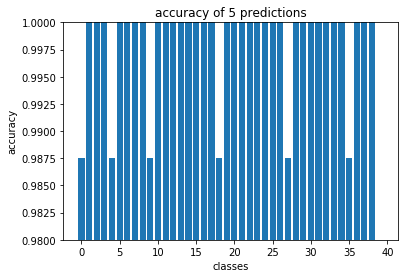

In [36]:
img_h = int(112/4)
img_w = int(92/4)

# 5 fold validation
for t in [[1,2],[3,4], [5,6], [7,8], [9,10]]:
    accuracy = []
    test = t
    train = [i for i in range(1,11) if i not in test]
    train_x = np.zeros((40*8 ,img_h*img_w))
    train_y = []
    cnt = 0
    for i in train:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            train_x[cnt,:] = img.reshape(-1)
            cnt += 1
            train_y.append(p)
#     train_y = np.array(train_y).reshape(1,-1)
    test_x = np.zeros((40*2 ,img_h*img_w))
    test_y = []
    cnt = 0
    for i in test:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            test_x[cnt, :] = img.reshape(-1)
            cnt += 1
            test_y.append(p)
    test_y = np.array(test_y)
    
    # ----------------------------------
    # G
    # add bias column
#     X = np.concatenate((train_x, np.ones((train_x.shape[0], 1))), axis=1)
    test_x = np.concatenate((test_x, np.ones((test_x.shape[0], 1))), axis=1)
    
    # h
    label = make_ovr_label(train_y)
    test_y = make_ovr_label(test_y)
    
    # 
    
    for i, l in enumerate(label):
#         h = cvxopt.matrix(np.array(l))
        X = np.concatenate((train_x, np.ones((train_x.shape[0], 1))), axis=1)
        for se, val in enumerate(l):
            if val ==1.0:
                X[se, :] = X[se, :] * (-1)
        G = cvxopt.matrix(X)
        h = cvxopt.matrix(np.array([-1.0]*len(l)))
            # P
        iden = np.identity(X.shape[1])
        iden[iden.shape[1]-1][iden.shape[1]-1] = 0
        P = cvxopt.matrix(iden)
        # q
        q = cvxopt.matrix(np.zeros([X.shape[1]]))
        
        # solver
        sol = cvxopt.solvers.qp(P, q, G, h)
        # so, got the weights
        w = np.array(sol['x'])
        # prediction
        test_predict = test_x @ w
        # calculate accuracy
        test_y_label = test_y[i]
        correct = 0
        for c, pred in enumerate(test_predict.reshape((80,))):
            if pred < 0 and test_y_label[c] < 0:
                correct +=1
            elif pred > 0 and test_y_label[c] > 0:
                correct +=1
    # print(correct/test_predict.shape[0])
        accuracy.append(correct/(test_predict.shape[0]))


    # plot accuracy
    plt.bar(range(len(accuracy)), accuracy)
    plt.xlabel('classes')
    plt.ylim(0.98,1)
    plt.ylabel('accuracy')
    plt.title('accuracy of 5 predictions')
    plt.show()

##### polynomial_kernel SVM

In [3]:
def polynomial_kernel(x, z, poly=2):
    return (1 + np.dot(x, z)) ** poly

In [4]:
epsilon = 0

     pcost       dcost       gap    pres   dres
 0: -2.2303e-12 -6.6507e-12  3e+02  2e+01  1e+00
 1: -4.4383e-14 -8.9209e-12  3e+00  2e-01  1e-02
 2: -4.4603e-16 -8.9211e-12  3e-02  2e-03  1e-04
 3: -4.5919e-18 -8.9211e-12  3e-04  2e-05  1e-06
 4: -1.3182e-17 -8.9211e-12  3e-06  2e-07  1e-08
 5: -1.3129e-15 -8.9185e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9027e-12 -5.6843e-12  3e+02  2e+01  1e+00
 1: -3.7863e-14 -7.6104e-12  3e+00  2e-01  1e-02
 2: -3.8051e-16 -7.6106e-12  3e-02  2e-03  1e-04
 3: -3.9328e-18 -7.6106e-12  3e-04  2e-05  1e-06
 4: -1.2784e-17 -7.6106e-12  3e-06  2e-07  1e-08
 5: -1.2737e-15 -7.6081e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9917e-12 -8.9813e-12  3e+02  2e+01  1e+00
 1: -5.9535e-14 -1.1966e-11  3e+00  2e-01  1e-02
 2: -5.9832e-16 -1.1967e-11  3e-02  2e-03  1e-04
 3: -6.1942e-18 -1.1967e-11  3e-04  2e-05  1e-06
 4: -2.1139e-17 -1.1967e

     pcost       dcost       gap    pres   dres
 0: -3.1843e-12 -9.6065e-12  3e+02  2e+01  1e+00
 1: -6.3367e-14 -1.2736e-11  3e+00  2e-01  1e-02
 2: -6.3682e-16 -1.2737e-11  3e-02  2e-03  1e-04
 3: -6.5833e-18 -1.2737e-11  3e-04  2e-05  1e-06
 4: -2.1545e-17 -1.2737e-11  3e-06  2e-07  1e-08
 5: -2.1464e-15 -1.2733e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.0513e-12 -9.0949e-12  3e+02  2e+01  1e+00
 1: -6.0721e-14 -1.2205e-11  3e+00  2e-01  1e-02
 2: -6.1023e-16 -1.2205e-11  3e-02  2e-03  1e-04
 3: -6.3309e-18 -1.2205e-11  3e-04  2e-05  1e-06
 4: -2.2889e-17 -1.2205e-11  3e-06  2e-07  1e-08
 5: -2.2809e-15 -1.2201e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6943e-12 -8.0718e-12  3e+02  2e+01  1e+00
 1: -5.3617e-14 -1.0777e-11  3e+00  2e-01  1e-02
 2: -5.3884e-16 -1.0777e-11  3e-02  2e-03  1e-04
 3: -5.5505e-18 -1.0777e-11  3e-04  2e-05  1e-06
 4: -1.6239e-17 -1.0777e

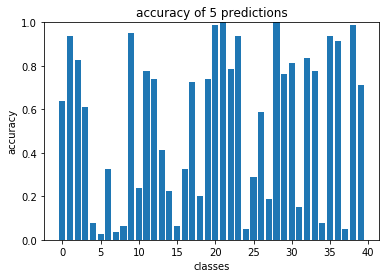

     pcost       dcost       gap    pres   dres
 0: -2.7087e-12 -8.0718e-12  3e+02  2e+01  1e+00
 1: -5.3902e-14 -1.0834e-11  3e+00  2e-01  1e-02
 2: -5.4171e-16 -1.0835e-11  3e-02  2e-03  1e-04
 3: -5.6195e-18 -1.0835e-11  3e-04  2e-05  1e-06
 4: -2.0271e-17 -1.0835e-11  3e-06  2e-07  1e-08
 5: -2.0200e-15 -1.0831e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8817e-12 -5.6275e-12  3e+02  2e+01  1e+00
 1: -3.7446e-14 -7.5264e-12  3e+00  2e-01  1e-02
 2: -3.7633e-16 -7.5269e-12  3e-02  2e-03  1e-04
 3: -3.8971e-18 -7.5269e-12  3e-04  2e-05  1e-06
 4: -1.3402e-17 -7.5269e-12  3e-06  2e-07  1e-08
 5: -1.3353e-15 -7.5242e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1257e-12 -9.3223e-12  3e+02  2e+01  1e+00
 1: -6.2202e-14 -1.2502e-11  3e+00  2e-01  1e-02
 2: -6.2512e-16 -1.2503e-11  3e-02  2e-03  1e-04
 3: -6.4925e-18 -1.2503e-11  3e-04  2e-05  1e-06
 4: -2.4162e-17 -1.2503e

     pcost       dcost       gap    pres   dres
 0: -2.8013e-12 -8.4128e-12  3e+02  2e+01  1e+00
 1: -5.5745e-14 -1.1205e-11  3e+00  2e-01  1e-02
 2: -5.6023e-16 -1.1205e-11  3e-02  2e-03  1e-04
 3: -5.8212e-18 -1.1205e-11  3e-04  2e-05  1e-06
 4: -2.1927e-17 -1.1205e-11  3e-06  2e-07  1e-08
 5: -2.1851e-15 -1.1201e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8264e-12 -8.4697e-12  3e+02  2e+01  1e+00
 1: -5.6246e-14 -1.1306e-11  3e+00  2e-01  1e-02
 2: -5.6526e-16 -1.1306e-11  3e-02  2e-03  1e-04
 3: -5.8288e-18 -1.1306e-11  3e-04  2e-05  1e-06
 4: -1.7650e-17 -1.1306e-11  3e-06  2e-07  1e-08
 5: -1.7582e-15 -1.1302e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7649e-12 -8.1855e-12  3e+02  2e+01  1e+00
 1: -5.5022e-14 -1.1060e-11  3e+00  2e-01  1e-02
 2: -5.5296e-16 -1.1060e-11  3e-02  2e-03  1e-04
 3: -5.7016e-18 -1.1060e-11  3e-04  2e-05  1e-06
 4: -1.7229e-17 -1.1060e

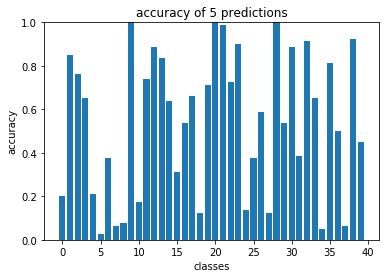

     pcost       dcost       gap    pres   dres
 0: -2.7534e-12 -8.2991e-12  3e+02  2e+01  1e+00
 1: -5.4792e-14 -1.1013e-11  3e+00  2e-01  1e-02
 2: -5.5065e-16 -1.1014e-11  3e-02  2e-03  1e-04
 3: -5.7117e-18 -1.1014e-11  3e-04  2e-05  1e-06
 4: -2.0551e-17 -1.1013e-11  3e-06  2e-07  1e-08
 5: -2.0479e-15 -1.1009e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6131e-12 -4.7748e-12  3e+02  2e+01  1e+00
 1: -3.2100e-14 -6.4522e-12  3e+00  2e-01  1e-02
 2: -3.2260e-16 -6.4523e-12  3e-02  2e-03  1e-04
 3: -3.3333e-18 -6.4523e-12  3e-04  2e-05  1e-06
 4: -1.0750e-17 -6.4523e-12  3e-06  2e-07  1e-08
 5: -1.0708e-15 -6.4502e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8206e-12 -8.4697e-12  3e+02  2e+01  1e+00
 1: -5.6131e-14 -1.1282e-11  3e+00  2e-01  1e-02
 2: -5.6410e-16 -1.1283e-11  3e-02  2e-03  1e-04
 3: -5.8621e-18 -1.1283e-11  3e-04  2e-05  1e-06
 4: -2.2143e-17 -1.1282e

     pcost       dcost       gap    pres   dres
 0: -3.1292e-12 -9.3223e-12  3e+02  2e+01  1e+00
 1: -6.2271e-14 -1.2517e-11  3e+00  2e-01  1e-02
 2: -6.2581e-16 -1.2517e-11  3e-02  2e-03  1e-04
 3: -6.4965e-18 -1.2517e-11  3e-04  2e-05  1e-06
 4: -2.3865e-17 -1.2517e-11  3e-06  2e-07  1e-08
 5: -2.3781e-15 -1.2512e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2463e-12 -9.7771e-12  3e+02  2e+01  1e+00
 1: -6.4601e-14 -1.2985e-11  3e+00  2e-01  1e-02
 2: -6.4922e-16 -1.2985e-11  3e-02  2e-03  1e-04
 3: -6.7392e-18 -1.2985e-11  3e-04  2e-05  1e-06
 4: -2.4733e-17 -1.2985e-11  3e-06  2e-07  1e-08
 5: -2.4646e-15 -1.2980e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.0356e-12 -9.0949e-12  3e+02  2e+01  1e+00
 1: -6.0408e-14 -1.2141e-11  3e+00  2e-01  1e-02
 2: -6.0709e-16 -1.2142e-11  3e-02  2e-03  1e-04
 3: -6.2799e-18 -1.2142e-11  3e-04  2e-05  1e-06
 4: -2.0937e-17 -1.2142e

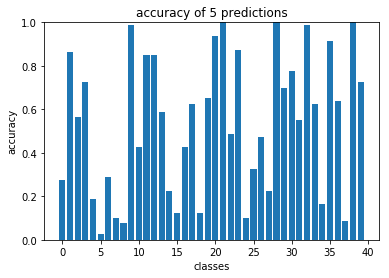

     pcost       dcost       gap    pres   dres
 0: -2.3959e-12 -7.2191e-12  3e+02  2e+01  1e+00
 1: -4.7678e-14 -9.5830e-12  3e+00  2e-01  1e-02
 2: -4.7915e-16 -9.5835e-12  3e-02  2e-03  1e-04
 3: -4.9490e-18 -9.5835e-12  3e-04  2e-05  1e-06
 4: -1.5774e-17 -9.5834e-12  3e-06  2e-07  1e-08
 5: -1.5715e-15 -9.5803e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8570e-12 -5.4570e-12  3e+02  2e+01  1e+00
 1: -3.6955e-14 -7.4274e-12  3e+00  2e-01  1e-02
 2: -3.7139e-16 -7.4281e-12  3e-02  2e-03  1e-04
 3: -3.8442e-18 -7.4281e-12  3e-04  2e-05  1e-06
 4: -1.3046e-17 -7.4281e-12  3e-06  2e-07  1e-08
 5: -1.2998e-15 -7.4255e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1991e-12 -9.5497e-12  3e+02  2e+01  1e+00
 1: -6.3662e-14 -1.2796e-11  3e+00  2e-01  1e-02
 2: -6.3979e-16 -1.2796e-11  3e-02  2e-03  1e-04
 3: -6.6391e-18 -1.2796e-11  3e-04  2e-05  1e-06
 4: -2.4151e-17 -1.2796e

     pcost       dcost       gap    pres   dres
 0: -2.9973e-12 -8.9813e-12  3e+02  2e+01  1e+00
 1: -5.9646e-14 -1.1989e-11  3e+00  2e-01  1e-02
 2: -5.9943e-16 -1.1989e-11  3e-02  2e-03  1e-04
 3: -6.2215e-18 -1.1989e-11  3e-04  2e-05  1e-06
 4: -2.2752e-17 -1.1989e-11  3e-06  2e-07  1e-08
 5: -2.2673e-15 -1.1985e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1060e-12 -9.4360e-12  3e+02  2e+01  1e+00
 1: -6.1809e-14 -1.2423e-11  3e+00  2e-01  1e-02
 2: -6.2117e-16 -1.2424e-11  3e-02  2e-03  1e-04
 3: -6.4230e-18 -1.2424e-11  3e-04  2e-05  1e-06
 4: -2.1164e-17 -1.2424e-11  3e-06  2e-07  1e-08
 5: -2.1086e-15 -1.2420e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1741e-12 -6.4801e-12  3e+02  2e+01  1e+00
 1: -4.3264e-14 -8.6962e-12  3e+00  2e-01  1e-02
 2: -4.3480e-16 -8.6964e-12  3e-02  2e-03  1e-04
 3: -4.4682e-18 -8.6964e-12  3e-04  2e-05  1e-06
 4: -1.2044e-17 -8.6963e

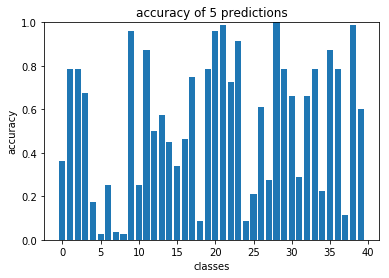

     pcost       dcost       gap    pres   dres
 0: -2.3099e-12 -6.8212e-12  3e+02  2e+01  1e+00
 1: -4.5967e-14 -9.2397e-12  3e+00  2e-01  1e-02
 2: -4.6195e-16 -9.2395e-12  3e-02  2e-03  1e-04
 3: -4.7803e-18 -9.2395e-12  3e-04  2e-05  1e-06
 4: -1.6098e-17 -9.2395e-12  3e-06  2e-07  1e-08
 5: -1.6040e-15 -9.2363e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6053e-12 -4.8317e-12  3e+02  2e+01  1e+00
 1: -3.1945e-14 -6.4206e-12  3e+00  2e-01  1e-02
 2: -3.2104e-16 -6.4211e-12  3e-02  2e-03  1e-04
 3: -3.3129e-18 -6.4211e-12  3e-04  2e-05  1e-06
 4: -1.0272e-17 -6.4210e-12  3e-06  2e-07  1e-08
 5: -1.0232e-15 -6.4190e-12  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9594e-12 -8.8676e-12  3e+02  2e+01  1e+00
 1: -5.8891e-14 -1.1837e-11  3e+00  2e-01  1e-02
 2: -5.9184e-16 -1.1837e-11  3e-02  2e-03  1e-04
 3: -6.1278e-18 -1.1837e-11  3e-04  2e-05  1e-06
 4: -2.0967e-17 -1.1837e

     pcost       dcost       gap    pres   dres
 0: -3.1584e-12 -9.4929e-12  3e+02  2e+01  1e+00
 1: -6.2851e-14 -1.2633e-11  3e+00  2e-01  1e-02
 2: -6.3164e-16 -1.2633e-11  3e-02  2e-03  1e-04
 3: -6.5582e-18 -1.2633e-11  3e-04  2e-05  1e-06
 4: -2.4210e-17 -1.2633e-11  3e-06  2e-07  1e-08
 5: -2.4126e-15 -1.2629e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1361e-12 -9.3223e-12  3e+02  2e+01  1e+00
 1: -6.2408e-14 -1.2544e-11  3e+00  2e-01  1e-02
 2: -6.2718e-16 -1.2544e-11  3e-02  2e-03  1e-04
 3: -6.4862e-18 -1.2544e-11  3e-04  2e-05  1e-06
 4: -2.1469e-17 -1.2544e-11  3e-06  2e-07  1e-08
 5: -2.1391e-15 -1.2540e-11  3e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7351e-12 -8.1286e-12  3e+02  2e+01  1e+00
 1: -5.4429e-14 -1.0940e-11  3e+00  2e-01  1e-02
 2: -5.4700e-16 -1.0940e-11  3e-02  2e-03  1e-04
 3: -5.6263e-18 -1.0940e-11  3e-04  2e-05  1e-06
 4: -1.5664e-17 -1.0940e

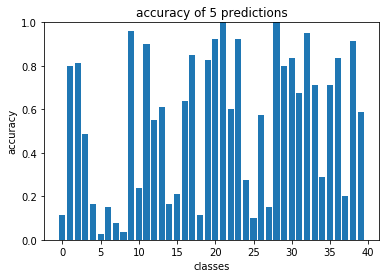

In [32]:
img_h = int(112/4)
img_w = int(92/4)

# 5 fold validation
for t in [[1,2],[3,4], [5,6], [7,8], [9,10]]:
    accuracy = []
    test = t
    train = [i for i in range(1,11) if i not in test]
    train_x = np.zeros((40*8 ,img_h*img_w))
    train_y = []
    cnt = 0
    for i in train:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            train_x[cnt,:] = img.reshape(-1)
            cnt += 1
            train_y.append(p)
#     train_y = np.array(train_y).reshape(1,-1)
    test_x = np.zeros((40*2 ,img_h*img_w))
    test_y = []
    cnt = 0
    for i in test:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            test_x[cnt, :] = img.reshape(-1)
            cnt += 1
            test_y.append(p)
    test_y = np.array(test_y)
    
    
    label = make_ovr_label(train_y)
    test_y = make_ovr_label(test_y)
    
    
    # ----------------------------------
    
    for i, l in enumerate(label):
        
        Y_train = np.array(l)
        length = train_x.shape[0]

        y_gram = np.outer(Y_train, Y_train)

        x_gram = np.zeros((length, length))
        for u in range(length):
            for j in range(length):
                x_gram[u][j] += polynomial_kernel(train_x[u], train_x[j])

        # SOLVER
        P = cvxopt.matrix(y_gram * x_gram)
        q = cvxopt.matrix(np.ones(length) * -1)  # 'q' must be a 'd' matrix with one column

        A = cvxopt.matrix(Y_train, (1, length))
        b = cvxopt.matrix(0.0) 

        G = cvxopt.matrix(np.identity(length) * -1)
        h = cvxopt.matrix(np.zeros(length))
        # 
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        alpha = np.ravel(sol['x'])
        index = [ii for ii in range(len(alpha)) if alpha[ii] > epsilon]

        # Support Vector
        support_vector = []
        for ind in index:
            support_vector.append(train_x[ind])
        support_vector = np.array(support_vector)

        # BIAS
        b = 0
        for j in index:
            sigma = 0
            for le in range(length):
                sigma += alpha[le] * l[le] * x_gram[le, j]
            b += l[j] - sigma
        b = b/len(index)

        # predict x 
        sigma = np.zeros(len(test_x))
        for pos in range(len(test_x)):
            for alp in range(len(alpha)):
                sigma[pos] += alpha[alp] * l[alp] * polynomial_kernel(test_x[pos], train_x[alp])
        test_y_label = test_y[i]
        
        # judge
        correct = 0
        for pos, sign in enumerate(np.sign(sigma)):
            if np.sign(np.array(test_y_label))[pos] == sign:
                correct += 1
        accuracy.append(correct/len(test_y_label))
        
    # plot accuracy
    plt.bar(range(len(accuracy)), accuracy)
    plt.xlabel('classes')
    plt.ylim(0,1)
    plt.ylabel('accuracy')
    plt.title('accuracy of 5 predictions')
    plt.show()

    